In [1]:
# Imports
%load_ext autoreload
%autoreload 2
import csv
import importlib
from scripts import proj1_helpers, helpers
from scripts import implementation, feature_processing, k_fold, model_logistic
import numpy as np

In [2]:
train_path = '../data/train.csv'
test_path  = '../data/test.csv'
output_path = '../data/logreg_submission.csv'

In [3]:
# loading data
y, X, idx = proj1_helpers.load_csv_data(train_path)
y_t, X_t, ids_t = proj1_helpers.load_csv_data(test_path)

In [4]:
X_p = feature_processing.process_X(X)
X_t_p = feature_processing.process_X(X_t)

100%|██████████| 5/5 [00:18<00:00,  3.60s/it]


In [7]:
w0 = np.random.randn(X_p.shape[1], 1)

model = implementation.reg_logistic_regression
model_args = {'initial_w': w0, 'max_iters': 100, 'gamma': 1e-5, 'debug': False}
loss = model_logistic.reg_loss

k_fold.cross_validation_select(X_p, y, model, loss, kw_model = model_args, seed = 1, k_fold = 5, N = 20, do_plot = True)

  0%|          | 0/100 [00:00<?, ?epoch/s]


MemoryError: 

### Model selection

In [19]:
from plots import cross_validation_visualization

def cross_validation_select(seed, degree, k_fold):
    lambdas = np.logspace(-6, 0, 30)
    
    # split data in k fold
    k_indices = build_k_indices(len(y), k_fold, seed)
    
    # define lists to store the loss of training data and test data
    rmse_tr, rmse_te = [], []
    rmse = [rmse_tr, rmse_te]
    rmse_all = [[], []]
    
    for lambda_ in lambdas:
        rmse_ = [[], []]
        for k in range(k_fold):
            [rmse_[i].append(x) for i, x in
             enumerate(cross_validation(y, x, k_indices, k, lambda_, degree))]
        [rmse[i].append(np.mean(x)) for (i, x) in enumerate(rmse_)]
        [rmse_all[i].append(x) for (i, x) in enumerate(rmse_)]
    
    idx_min = np.argmin(rmse_te)
    
    return idx_min, rmse_all, lambdas

[  1.00000000e-06   1.61026203e-06   2.59294380e-06   4.17531894e-06
   6.72335754e-06   1.08263673e-05   1.74332882e-05   2.80721620e-05
   4.52035366e-05   7.27895384e-05   1.17210230e-04   1.88739182e-04
   3.03919538e-04   4.89390092e-04   7.88046282e-04   1.26896100e-03
   2.04335972e-03   3.29034456e-03   5.29831691e-03   8.53167852e-03
   1.37382380e-02   2.21221629e-02   3.56224789e-02   5.73615251e-02
   9.23670857e-02   1.48735211e-01   2.39502662e-01   3.85662042e-01
   6.21016942e-01   1.00000000e+00] 0 1e-06
1e-06
Degree 0 Lambda 0.00000 Test loss 0.341 +- 0.002 Train loss 0.341 +- 0.000


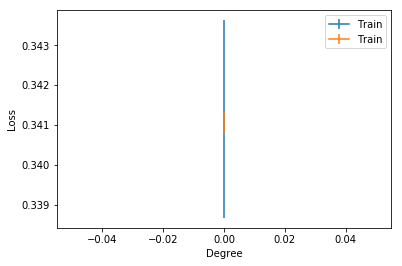

In [20]:
def get_best_models(degrees, seed, k_fold):
    lambdas = None
    tr_losses = []
    tr_losses_std = []
    te_losses = []
    te_losses_std = []
    for degree in degrees:
        idx_min, rmse_all, lambdas = cross_validation_select(seed, degree, k_fold)
        print(lambdas,idx_min,lambdas[0]);
        lambda_best = lambdas[idx_min]
        print(lambda_best)
        te_loss = np.mean(rmse_all[1][idx_min])
        te_losses.append(te_loss)
        te_loss_std = np.std(rmse_all[1][idx_min])
        te_losses_std.append(te_loss_std)
        tr_loss = np.mean(rmse_all[0][idx_min])
        tr_losses.append(tr_loss)
        tr_loss_std = np.std(rmse_all[0][idx_min])
        tr_losses_std.append(tr_loss_std)
        print("Degree %d Lambda %.5f Test loss %.3f +- %.3f Train loss %.3f +- %.3f" %
              (degree, lambda_best, te_loss, te_loss_std, tr_loss, tr_loss_std))
    
    plt.figure()
    plt.errorbar(degrees, te_losses, yerr = te_losses_std, label = 'Train')
    plt.errorbar(degrees, tr_losses, yerr = tr_losses_std, label = 'Train')
    plt.legend()
    plt.xlabel('Degree')
    plt.ylabel('Loss')
    plt.show()
    
get_best_models(np.arange(1), 1, 10)
#get_best_models(np.arange(10), 2, 10)

## Bias-Variance Decomposition
Visualize bias-variance trade-off by implementing the function `bias_variance_demo()` below:

In [ ]:
from implementation import least_squares
from split_data import split_data
from plots import bias_variance_decomposition_visualization

def bias_variance_demo(ridge_lambda = 0, use_cv = 0):
    """The entry."""
    # define parameters
    seeds = range(100)
    num_data = 5000
    ratio_train = 0.005
    degrees = range(1, 10)
    
    k_fold = 4
    
    # define list to store the variable
    rmse_tr = np.zeros((len(seeds), len(degrees)))
    rmse_te = np.zeros((len(seeds), len(degrees)))
    
    for index_seed, seed in tqdm(enumerate(seeds)):
        np.random.seed(seed)
        x = np.linspace(0.1, 2 * np.pi, num_data)
        y = np.sin(x) + 0.3 * np.random.randn(num_data).T
        
        idx_tr, idx_te = split_data(x, y, ratio_train, seed = seed)
        
        for index_degree, degree in enumerate(degrees):
            # building polynomial matrix for whole dataset
            #x_poly = build_poly(x, degree)
            y,tx = build_model_data(x,y)

        
            # x data: train/test
            x_tr = tx[idx_tr, :]
            x_te = tx[idx_te, :]
    
            # y data: train/test
            y_tr = y[idx_tr]
            y_te = y[idx_te]

            if use_cv:
                # selecting lambda:
                idx_min, rmse_all, lambdas = cross_validation_select(np.array(x)[idx_tr], y_tr, seed, degree, k_fold)
                ridge_lambda = lambdas[idx_min]
            
            # training ridge regression
            if ridge_lambda > 0:
                weights = ridge_regression(y_tr, x_tr, ridge_lambda)
            else:
                weights = least_squares(y_tr, x_tr)

            # computing losses
            rmse_tr[index_seed, index_degree] = compute_mse(y_tr, x_tr, weights)
            rmse_te[index_seed, index_degree] = compute_mse(y_te, x_te, weights)

    plt.figure()
    bias_variance_decomposition_visualization(degrees, rmse_tr, rmse_te)
    plt.boxplot(rmse_tr, positions = degrees)
    plt.boxplot(rmse_te, positions = degrees)
    plt.show()

In [ ]:
# least squares
bias_variance_demo()

In [ ]:
# ridge
bias_variance_demo(ridge_lambda = 1)

In [ ]:
# ridge with CV for lambda
bias_variance_demo(use_cv = 1)

In [32]:
from proj1_helpers import predict_labels
from proj1_helpers import create_csv_submission

def build_model(lambda_val,name):
    X_t = impute_with_mean(x_test)
    X_ts, _, _ = helpers.standardize(X_t)
    y_t, tx_t = helpers.build_model_data(X_ts, y_test)
    
    y_m,tx = build_model_data(x,y)
    weights = ridge_regression(y_m, tx, lambda_val)
    
    y_pred=predict_labels(weights,tx_t)
    create_csv_submission(ids_test,y_pred,name)


In [33]:
build_model(0.000001,"submit_csv")